# Team PySpark Final Project

Given that the idea of microloans is to help those without means use entrepreneurship and small loans to catapult themselves out of poverty, we wanted to look at the FACTORS that make a loan application successful, in that they get a loan and the loan is then repaid, thus the business application was successful. If we can use regression analysis to identify the most important factors that lead to a client being successful, we can create a visualization and app so they can see what they might change in order to raise their chances of success in both getting the loan and having the business be successful.

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Basic libraries

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from os import path
from PIL import Image 
import datetime

#NLP
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Machine Learning
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

#Visualizations
import plotly.express as px
import hvplot.pandas
import plotly as pl
import matplotlib.pyplot as plt

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import ClusterCentroids
# from imblearn.combine import SMOTEENN
# from imblearn.metrics import classification_report_imbalanced

# Read the CSV and Perform Basic Data Cleaning

In [6]:
# Load the data
file_path = Path('ProjectResources/loans.csv')
loans_df = pd.read_csv(file_path)  # Can ddd in ( , index_col=0) if need to say which col becomes index


loc_path = Path('ProjectResources/kiva_locations.csv')
loc_df = pd.read_csv(loc_path)

lender_path = Path('ProjectResources/lenders.csv')
lender_df = pd.read_csv(lender_path)



In [11]:
loans_df.head(10)

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,492621,Jorge Leonardo,Spanish,"\nJorge tiene 24 años de edad, es soltero no t...","Jorge, 24, is single and has no children. At ...",1075.0,1075.0,funded,1228697.0,NaN,...,13.0,27,1,1,NaN,Jorge Leonardo,male,true,monthly,field_partner
1,999810,NaN,NaN,NaN,NaN,450.0,450.0,funded,NaN,NaN,...,14.0,7,3,2,NaN,NaN,NaN,NaN,monthly,field_partner
2,379333,Josefina,English,Josefina is from Macupa Tangub City. She is 55...,NaN,200.0,200.0,funded,977960.0,NaN,...,8.0,4,2,1,NaN,Josefina,female,true,monthly,field_partner
3,1822382,Gloria Shatrah,English,Gloria Shatrah is 19 years old and lives in th...,Gloria Shatrah is 19 years old and lives in th...,175.0,175.0,funded,3234596.0,NaN,...,7.0,4,1,1,NaN,Gloria Shatrah,female,true,monthly,field_partner
4,1279356,Makerita,English,Makerita is a 24-year-old single woman with on...,Makerita is a 24-year-old single woman with on...,400.0,400.0,funded,2499750.0,NaN,...,14.0,8,1,1,"#Parent, #Woman-Owned Business, user_favorite,...",Makerita,female,true,monthly,field_partner
5,503440,Cerila,English,Cerila is 54 years old and widowed with eight ...,NaN,375.0,375.0,funded,1248353.0,NaN,...,10.0,15,1,1,NaN,Cerila,female,true,monthly,field_partner
6,147816,Feliza,English,Feliza P. is from the village of Clarin. She i...,NaN,150.0,150.0,funded,414785.0,NaN,...,8.0,6,2,1,NaN,Feliza,female,true,monthly,field_partner
7,113083,Nida,English,Nida D. is from the village of Mansabay Bajo. ...,NaN,450.0,450.0,funded,329509.0,NaN,...,12.0,12,2,1,NaN,Nida,female,true,monthly,field_partner
8,1331466,Ma.Nita,English,Ma. Nita is 63 years old and married with eigh...,Ma. Nita is 63 years old and married with eigh...,500.0,500.0,funded,2573437.0,NaN,...,10.0,10,2,1,"#Woman-Owned Business, #Elderly",Ma.Nita,female,true,monthly,field_partner
9,1057993,Teresita,English,Teresita is 47 years old and married. She has ...,Teresita is 47 years old and married. She has ...,125.0,125.0,funded,2158877.0,NaN,...,11.0,4,1,1,#Animals,Teresita,female,true,monthly,field_partner


In [7]:
loc_df.head(10)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
5,"Daykundi, Afghanistan",AFG,Afghanistan,Daykundi,South Asia,0.313,"(33.669495, 66.0463534)",33.669495,66.046353
6,"Farah, Afghanistan",AFG,Afghanistan,Farah,South Asia,0.319,"(32.4464635, 62.1454133)",32.446464,62.145413
7,"Faryab, Afghanistan",AFG,Afghanistan,Faryab,South Asia,0.250,"(36.0795613, 64.90595499999999)",36.079561,64.905955
8,"Ghazni, Afghanistan",AFG,Afghanistan,Ghazni,South Asia,0.245,"(33.5450587, 68.4173972)",33.545059,68.417397
9,"Ghor, Afghanistan",AFG,Afghanistan,Ghor,South Asia,0.384,"(34.0995776, 64.90595499999999)",34.099578,64.905955


In [8]:
lender_df.head(10)

,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,fabian81869057,Fabian,NaN,NaN,NaN,NaN,1594622834,NaN,NaN,NaN,NaN,1,NaN,0
1,bennett2496,Bennett,NaN,NaN,NaN,NaN,1590673105,NaN,NaN,NaN,NaN,1,Connor,0
2,anja2783,Anja,NaN,NaN,NaN,NaN,1590577215,NaN,NaN,NaN,NaN,2,NaN,0
3,paula2469,Paula,NaN,NaN,NaN,NaN,1590672383,NaN,NaN,NaN,NaN,4,NaN,0
4,don5435,Don,NaN,NaN,NaN,NaN,1590551023,NaN,NaN,NaN,NaN,1,NaN,0
5,becky5088,Becky,NaN,NaN,NaN,NaN,1590577338,NaN,NaN,NaN,NaN,1,NaN,0
6,seelan7526,Seelan,NaN,NaN,NaN,NaN,1590577108,NaN,NaN,NaN,NaN,1,NaN,0
7,gina7104,Gina,NaN,NaN,NaN,NaN,1594612210,NaN,NaN,NaN,NaN,1,Kitty and Jim,0
8,myra96011348,Myra,NaN,NaN,NaN,NaN,1594606657,NaN,NaN,NaN,NaN,1,NaN,0
9,penelope6298,Penelope,NaN,NaN,NaN,NaN,1590538838,NaN,NaN,NaN,NaN,1,NaN,0


In [37]:
loans_df['TOWN_NAME'].unique

<bound method Series.unique of 0                                  Quevedo
1                                      NaN
2          Tangub City, Misamis Occidental
3                                Kasangati
4                                  Vailele
                        ...               
1945960                        Kwa, Migori
1945961                              Danli
1945962                     Kabazi, Nakuru
1945963                   Banarpal, Odisha
1945964                            Loutana
Name: TOWN_NAME, Length: 1945965, dtype: object>

In [ ]:
#Dataset at a glance:

loans = loans_df.count
languages = loans_df.ORIGINAL_LANGUAGE.count
#descriptive_loans = loans_df.head
#status = loans_df.head


print("There are {loans_df.count} observations and {} features in this dataset. \n".#format(df.shape[0],df.shape[1]))



In [ ]:
#pick a sample of the data as using all did not work for get dummies (10% used)
viz_df = loans_df.sample(frac =.01) 

# Data Visualizations 

### Word Clouds

In [ ]:
df_country = loans_df[['COUNTRY_NAME', 'DESCRIPTION', 'LOAN_AMOUNT']]
df_country.tail(10)

In [ ]:
'LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL'],
      dtype='object')

In [ ]:
country = df_country.groupby('COUNTRY_NAME')
country.tail()

In [ ]:
country.describe().head()

In [ ]:
mean = country.mean().sort_values(by="LOAN_AMOUNT", ascending=False)

In [ ]:
plt.figure(figsize=(25,20))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country")
plt.ylabel("Total Loans ($)")
plt.show()

In [ ]:
?WordCloud

In [ ]:
# Start with one review
text = df_country.DESCRIPTION[0]

#Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

#Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
tag_list_na = viz_df.DESCRIPTION.dropna()

In [ ]:
df_country.DESCRIPTION.astype(str)

In [ ]:
text = " ".join(review for review in tag_list_na)
print ("There are {} words in the combination of all descriptions.".format(len(text)))

In [ ]:
#Create stopwords list
stopwords = set(STOPWORDS)
stopwords.update(["is", "a", "the", "in", "en", "es", "br", "n", "year"])

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

#Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# Save image
wordcloud.to_file("images/description.png")

### Mapping data points

In [14]:
map = plt.imread("images/map.png")

In [18]:
BBox = ((loc_df.lon.min(),   loc_df.lon.max(),      
         loc_df.lat.min(), loc_df.lat.max()))

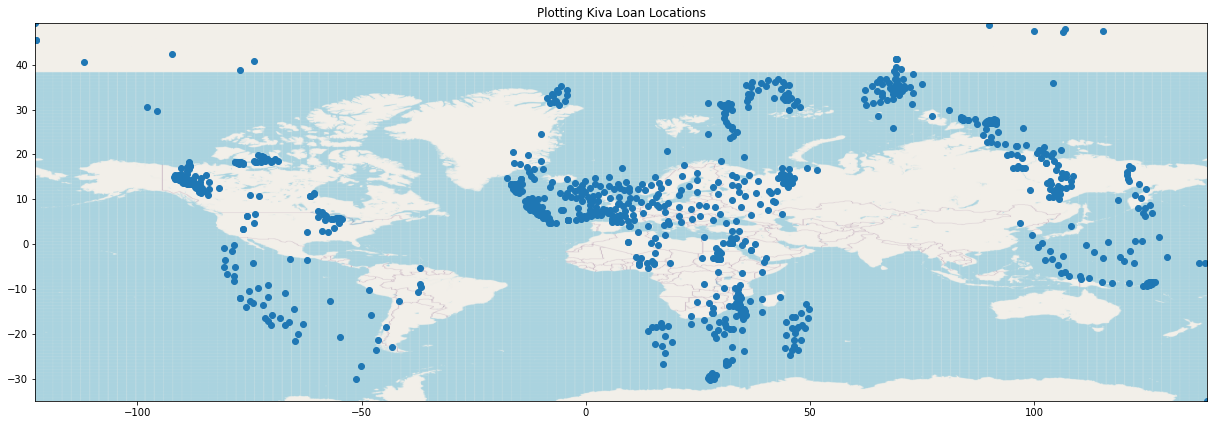

In [36]:
# Creating a map layer and adding data points to it
fig, ax = plt.subplots(figsize = (21, 18))

ax.scatter(loc_df.lon, loc_df.lat)
ax.set_title('Plotting Kiva Loan Locations')
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
 # I built this simply by layering the locations over a map background.  The image STINKS! LOL.
# I will rebuild it i
    